### Model Predicting Fire & Non Fire Using Thermal Hot Images  

In [ ]:
!pip install -U scikit-image

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from PIL import Image,ImageEnhance,ImageOps

In [2]:
classes = {'Fire':0 ,"No_Fire":1}
print(os.listdir("C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training/"))

['Fire', 'No_Fire']


In [3]:
classes

{'Fire': 0, 'No_Fire': 1}

In [4]:
#Resize images to
SIZE = 224

In [5]:
#Capture images and labels into arrays.
#Start by creating empty lists.
train_images = []
train_labels = [] 
for directory_path in glob.glob("C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = Image.open(img_path)
#         img = ImageOps.grayscale(img)
#         img = ImageEnhance.Contrast(img).enhance(2)
#         img = ImageEnhance.Sharpness(img).enhance(50)
#         img = ImageEnhance.Brightness(img).enhance(1)
        img = img.resize((SIZE,SIZE))
        img = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Fire
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 10140.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 1020.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 10410.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 10440.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 1050.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 10680.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame De

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 15450.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 15480.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 15510.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 15540.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 15570.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 15600.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detec

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 18270.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 18300.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 18330.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 18390.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 18600.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 18630.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detec

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 20790.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 20820.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 20850.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 20880.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 20910.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 20940.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detec

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 23040.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 23070.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 2310.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 23130.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 23190.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 23250.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detect

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 25650.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 25680.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 25710.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 25740.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 25770.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 2580.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detect

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 28830.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 28860.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 28890.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 28920.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 28950.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 28980.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detec

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 32340.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 32400.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 32460.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 32490.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 32520.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 32550.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detec

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 38490.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 38850.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 38880.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 38910.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 38940.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 38970.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detec

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 40650.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 40680.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 40710.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 40740.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 40770.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 4080.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detect

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 42720.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 43020.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 43080.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 43110.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 43140.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 43170.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detec

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 5940.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 5970.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 600.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 6000.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 6030.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 6060.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & 

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 7680.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 8400.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 8430.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 8460.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 8490.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\Fire\Image 8520.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection &

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10290 - Copy (12) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10290 - Copy (12).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10290 - Copy (13) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10290 - Copy (13).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10290 - Copy (14) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Trai

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10320 - Copy (2) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10320 - Copy (2).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10320 - Copy (3) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10320 - Copy (3).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10320 - Copy (4) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10920 - Copy (13).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10920 - Copy (14).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10920 - Copy (2).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10920 - Copy (3).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10920 - Copy (4).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 10920

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 12330 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 12330.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 12360 - Copy (2).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 12360 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 12360.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 12390.jpg
C:/Users/Lenovo/Desktop/Sym

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 13650.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 13680.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 13710.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 13740.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 13770.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 13800.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/P

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 23760 - Copy (11).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 23760 - Copy (12).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 23760 - Copy (13).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 23760 - Copy (14).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 23760 - Copy (2).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 237

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 29220 - Copy (7).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 29220 - Copy (8).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 29220 - Copy (9).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 29220 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 29220.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 29250 - Copy (10).jpg


C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 30870 - Copy (4).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 30870 - Copy (5).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 30870 - Copy (6).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 30870 - Copy (7).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 30870 - Copy (8).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 30870 -

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 32070 - Copy (3).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 32070 - Copy (4).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 32070 - Copy (5).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 32070 - Copy (6).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 32070 - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 32070.jpg
C

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 7740 - Copy (12).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 7740 - Copy (13) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 7740 - Copy (13).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 7740 - Copy (14) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire\Image 7740 - Copy (14).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Training\No_Fire

In [6]:
train_images.shape , train_labels.shape

((1204, 224, 224, 3), (1204,))

In [7]:
#train_labels

In [8]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing/*"):
    t_label = directory_path.split("\\")[-1]
    print(t_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = Image.open(img_path)
#         img = ImageOps.grayscale(img)
#         img = ImageEnhance.Contrast(img).enhance(2)
#         img = ImageEnhance.Sharpness(img).enhance(50)
#         img = ImageEnhance.Brightness(img).enhance(1)
        img = img.resize((SIZE,SIZE))
        img = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
        test_images.append(img)
        test_labels.append(t_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Fire
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 33180.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 33210.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 33240.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 33270.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 33300.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 33330.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detect

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 34890.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 34920.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 34950.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 34980.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 35010.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\Fire\Image 35040.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection &

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 10290 - Copy (5).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 10290 - Copy (6) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 10290 - Copy (6).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 10290 - Copy (7) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 10290 - Copy (7).jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 12510.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 12540.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 12570.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 12600.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 12630.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 12660.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project

C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 7740 - Copy (20) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 7740 - Copy (21) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 7740 - Copy (22) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 7740 - Copy (23) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/Testing\No_Fire\Image 7740 - Copy (24) - Copy.jpg
C:/Users/Lenovo/Desktop/Symbiosis Research Project/Project Flame Detection & Classification/Datasets/Thermal_Fusion(Dataset)/

In [9]:
test_images.shape,test_labels.shape

((218, 224, 224, 3), (218,))

In [10]:
#Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [11]:
test_labels, test_labels_encoded

(array(['Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire', 'Fire',
        'Fire', 'Fire', 'Fire', 'Fire', 'No_Fire', 'No_Fire', 'No_Fire',
        'No_Fire', 'No_Fire', 'No_Fire', 'No_Fire', 'No_Fire', 

In [12]:
train_labels, train_labels_encoded

(array(['Fire', 'Fire', 'Fire', ..., 'No_Fire', 'No_Fire', 'No_Fire'],
       dtype='<U7'),
 array([0, 0, 0, ..., 1, 1, 1]))

In [13]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

----------------------------------------------

### Feature Extraction Using Filters

In [14]:
###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        input_img = x_train[image, :,:,:]
        img = input_img
        
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature
        
        #df['Image_Name'] = image   #Capture image name as we read multiple images
        
        # FEATURE 2 - Bunch of Gabor filter responses
        
                #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   #Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with 1 and 3
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
         
        # FEATURE 3 Sobel
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1
       
        #Add more filters as needed
        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [15]:
#Extract features from training images
image_features = feature_extractor(x_train)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853

Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [17]:
print(1204*224*224*3)

x_train.shape

181235712


(1204, 224, 224, 3)

In [18]:
image_features.shape

(181235712, 6)

In [19]:
#Reshape to a vector for Random Forest / SVM training
n_features = image_features.shape[1]

image_features = np.expand_dims(image_features, axis=0)

X_for_RF = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features

In [20]:
n_features

6

In [21]:
image_features.shape

(1, 181235712, 6)

In [22]:
X_for_RF.shape

(1204, 903168)

In [57]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 5, random_state = 42)

In [58]:
# Fit the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=5, random_state=42)

In [ ]:
#Can also use SVM but RF is faster and may be more accurate.
from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
SVM_model.fit(X_for_RF, y_train)

### Testing Model

In [26]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [59]:
#Predict on test using RF
test_prediction = RF_model.predict(test_for_RF)

In [ ]:
#Predict on test using SVM
test_pred = SVM_model.predict(test_for_RF)

In [60]:
#Inverse le transform to get original label back for RF
test_prediction = le.inverse_transform(test_prediction)

In [ ]:
#Inverse le transform to get original label back for SVM
test_pred = le.inverse_transform(test_pred)

In [61]:
#Print overall accuracy of RF
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.981651376146789


In [ ]:
#Print overall accuracy of SVM
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_pred))

In [23]:
!pip install scikit-plot

Training Accuracy: 0.9941860465116279
Testing Accuracy: 0.981651376146789
              precision    recall  f1-score   support

        Fire       0.99      0.97      0.98       100
     No_Fire       0.97      0.99      0.98       118

    accuracy                           0.98       218
   macro avg       0.98      0.98      0.98       218
weighted avg       0.98      0.98      0.98       218



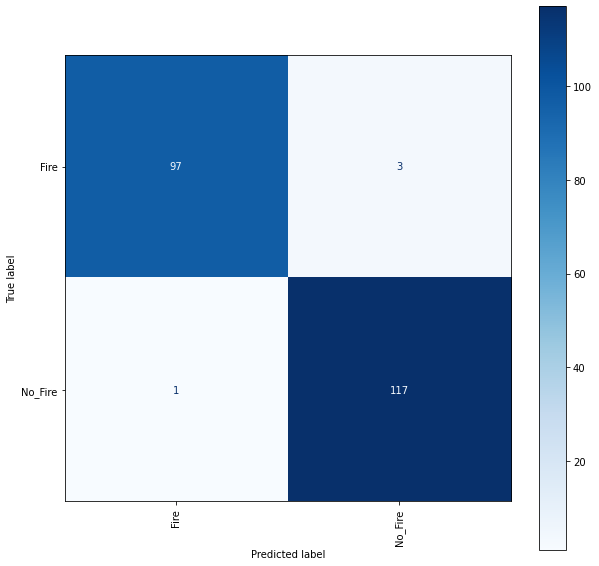

In [62]:
# RF Model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["Fire", "No_Fire"]

cm = confusion_matrix(test_labels, test_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10,10))

disp.plot(cmap=plt.cm.Blues,ax=ax, xticks_rotation='vertical')

print('Training Accuracy: ' +str(RF_model.score(X_for_RF, y_train)))

print('Testing Accuracy: ' +str(accuracy_score(test_labels, test_prediction)))

print(classification_report(test_labels, test_prediction))

In [64]:
mythreshold=0.88 #Random Threshold
from sklearn.metrics import confusion_matrix

y_pred = (RF_model.predict(test_for_RF)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

[[ 97   3]
 [  1 117]]


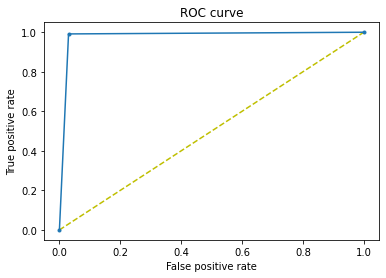

In [65]:
#ROC
from sklearn.metrics import roc_curve
y_preds = RF_model.predict(test_for_RF).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [66]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  1    1
Name: thresholds, dtype: int32


[[ 97   3]
 [  1 117]]


<AxesSubplot:>

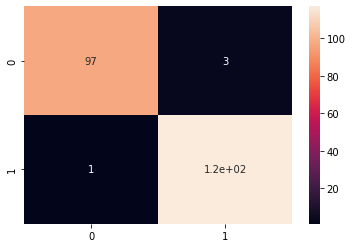

In [67]:
mythreshold=1 # Ideal thresholds
from sklearn.metrics import confusion_matrix

y_pred = (RF_model.predict(test_for_RF)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)
sns.heatmap(cm, annot=True)

In [68]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)

print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.9807627118644068


C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


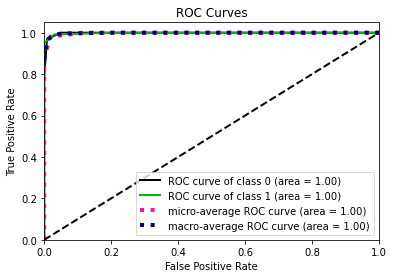

In [63]:
# RF Model
import scikitplot as skplt
import matplotlib.pyplot as plt

y_probas = RF_model.predict_proba(test_for_RF)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['Fire']
The actual label for this image is:  Fire


C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


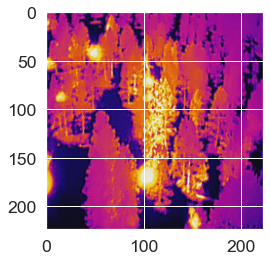

In [40]:
#Check results on a few random images for RF
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = RF_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['Fire']
The actual label for this image is:  Fire


C:\Users\Lenovo\anaconda3\envs\myDL\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


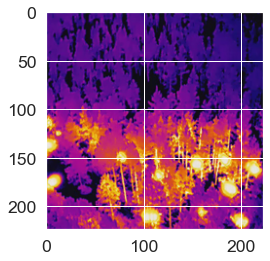

In [50]:
#Check results on a few random images of SVM
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_SVM = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = SVM_model.predict(input_img_for_SVM)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
# from PIL import Image , ImageOps , ImageEnhance
# print(classes)
# img = Image.open("./Datasets/Image 12624.jpg")

# # img = ImageOps.grayscale(img)
# # img = ImageEnhance.Contrast(img).enhance(2)
# # img = ImageEnhance.Sharpness(img).enhance(50)
# # img = ImageEnhance.Brightness(img).enhance(1)

# img = img.resize((SIZE,SIZE))

# plt.imshow(img)

# img = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)

# print("Original Image Shape",img.shape)

# #Extract features and reshape to right dimensions
# input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)

# print("Expanded Image Shape",input_img.shape)

# input_img_features=feature_extractor(input_img)

# print("Featured Image Shape",input_img_features.shape)

# input_img_features = np.expand_dims(input_img_features, axis=0)

# print("Expanded featured Image Shape",input_img_features.shape)

# input_img_for_RF=np.reshape(input_img_features, (input_img.shape[0], -1))

# print("Reshaping featured Image into single vector ",input_img_for_SVM.shape)

# #Predict
# img_prediction = RF_model.predict(input_img_for_RF)
# img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name

# print("The prediction for this image is: ", img_prediction)
# print("The actual label for this image is fire")